In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
import folium
from folium import plugins

In [ ]:
!pip install haversine
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mapa = folium.Map(
    location = [-22.123325, -42.710144],
    zoom_start=8
)

In [ ]:
#ponta inferior esquerda: -23.394702, -44.918488
folium.Marker(
    location=[-23.394702, -44.918488],
    popup='<i>-23.394702, -44.918488</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta superior direita: -20.737624, -40.902986
folium.Marker(
    location=[-20.737624, -40.902986],
    popup='<i>-20.737624, -40.902986</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta superior esquerda: -20.758172, -44.912995
folium.Marker(
    location=[-20.758172, -44.912995],
    popup='<i>-20.758172, -44.912995</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta inferior direita: -23.293832, -40.875520
folium.Marker(
    location=[-23.293832, -40.875520],
    popup='<i>-23.293832, -40.875520</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#localização radar -22.371427, -41.786991
folium.Marker(
    location=[-22.371427, -41.786991],
    popup='<i>-22.371427, -41.786991</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#localização ponto inicial -22.747445, -43.102014
folium.Marker(
    location=[-22.747445, -43.102014],
    popup='<i>-22.747445, -43.102014</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#localização ponto final -23.080871, -43.808421
folium.Marker(
    location=[-23.080871, -43.808421],
    popup='<i>-23.080871, -43.808421</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
mapa

In [ ]:
esq_sup = (-20.758172, -44.912995)
esq_inf = (-23.394702, -44.918488)
dir_sup = (-20.737624, -40.902986)
dir_inf = (-23.293832, -40.875520)
ponto_inicial = (-22.747445, -43.102014)
ponto_final = (-23.080871, -43.808421)
radar = (-22.371427, -41.786991)

In [ ]:
distancia_esquerda_cima = haversine(esq_sup, radar) 
distancia_esquerda_cima #em km

369.6839342126499

In [ ]:
distancia_esquerda_baixo = haversine(esq_inf, radar)
distancia_esquerda_baixo #em km

340.37227823276606

In [ ]:
distancia_direita_baixo = haversine(dir_inf, radar)
distancia_direita_baixo #em km

138.72627111557208

In [ ]:
distancia_direita_cima = haversine(dir_sup, radar)
distancia_direita_cima #em km

203.3755129594263

In [ ]:
distancia_ponto_inicial = haversine(ponto_inicial, radar)
distancia_ponto_inicial #em km

141.35950645115452

In [ ]:
distancia_ponto_final = haversine(ponto_final, radar)
distancia_ponto_final #em km

221.8198873962388

In [ ]:
folium.Circle([-22.371427, -41.786991],
                    radius=250000.00
                    ).add_to(mapa)

In [ ]:
folium.Circle([-22.371427, -41.786991],
                    radius=141359.50645115451392
                    ).add_to(mapa)

In [ ]:
folium.Circle([-22.371427, -41.786991],
                    radius=221819.8873962387968
                    ).add_to(mapa)

In [ ]:
plugins.SemiCircle(
    location=[-22.371427, -41.786991],   
    radius= 250000.00,          #Raio do círculo, em metros.    
    direction = 250,             #Ângulo de direção em graus
    arc = 25                   #Ângulo do arco em graus.
).add_to(mapa)

In [ ]:
mapa

In [ ]:
inicial_para_final = haversine(ponto_inicial, ponto_final) 
inicial_para_final #em km

81.29673970134971

In [ ]:
def LerH5(DATA,Chave):
    import h5py
    import os.path as path
    import numpy as np  
    if path.exists(DATA):
        with h5py.File(DATA,'r') as f:
            real = f[Chave][...]

    return(real)

In [ ]:
def ExtrairChaves(DATA):
    import h5py
    import os.path as path
    import numpy as np  
    if path.exists(DATA):
        f = h5py.File(DATA, 'r')
        return(f.keys() )
    #return(real)

In [ ]:
ExtrairChaves('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5')

<KeysViewHDF5 ['Data', 'Entropy', 'Latitude', 'Longitude', 'Time']>

In [ ]:
filename = h5py.File('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5', 'r')

In [ ]:
def printname(name): print(name)

In [ ]:
filename.visit(printname)

Data
Entropy
Latitude
Latitude/ELT1
Longitude
Longitude/ELT1
Time
Time/ELT1


In [ ]:
precipitacao = LerH5('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5', 'Data')
tempo = LerH5('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5', 'Time/ELT1')
latitude = LerH5('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5', 'Latitude/ELT1')
longitude = LerH5('/content/drive/MyDrive/precipitacao_6hr;de1ate1005Com dimensoes7Por7ComFonte2019 COSMO.h5', 'Longitude/ELT1')

In [ ]:
d = {'latitude': latitude, 'longitude': longitude}
df = pd.DataFrame(data=d)
df

,latitude,longitude
0,b'-23.1339033365138',b'-43.8906028271505'
1,b'-23.0647349667651',b'-43.7697438637654'
2,b'-22.9955665970164',b'-43.6488849003802'
3,b'-22.9263982272677',b'-43.5280259369951'
4,b'-22.857229857519',b'-43.4071669736099'
5,b'-22.7880614877703',b'-43.2863080102248'
6,b'-22.7188931180216',b'-43.1654490468397'


In [ ]:
precipitacao.shape

(8827, 7, 7)

In [ ]:
aux = pd.DataFrame(tempo)
aux[0] = aux[0].astype('str')
aux[0].str.contains('191224')

0       False
1       False
2       False
3       False
4       False
        ...  
8822    False
8823    False
8824    False
8825    False
8826    False
Name: 0, Length: 8827, dtype: bool

In [ ]:
indices = aux[aux[0].str.contains('191224')].index

In [ ]:
tempo[indices]

array([b'1912240000', b'1912240100', b'1912240200', b'1912240300',
       b'1912240400', b'1912240500', b'1912240600', b'1912240700',
       b'1912240800', b'1912240900', b'1912241000', b'1912241100',
       b'1912241200', b'1912241300', b'1912241400', b'1912241500',
       b'1912241600', b'1912241700', b'1912241800', b'1912241900',
       b'1912242000', b'1912242100', b'1912242200', b'1912242300'],
      dtype='|S11')

In [ ]:
type(tempo)

numpy.ndarray

In [ ]:
time = pd.DataFrame(tempo)[0].astype("str").str.replace("b", "").str.replace("'", "").astype("int")

In [ ]:
time = np.array(time)
time

array([1812310600, 1812310700, 1812310800, ..., 2001022200, 2001022300,
       2001030000])

In [ ]:
array = {'dataHora': time}
dset = pd.DataFrame(data=array)

In [ ]:
dset

,dataHora
0,1812310600
1,1812310700
2,1812310800
3,1812310900
4,1812311000
...,...
8822,2001022000
8823,2001022100
8824,2001022200
8825,2001022300


In [ ]:
precipitacao = precipitacao[indices]

In [ ]:
precipitacao.shape

(24, 7, 7)

In [ ]:
np.mean(precipitacao, axis=1).shape

(24, 7)

In [ ]:
precipitacao = np.mean(np.mean(precipitacao, axis=1), axis=1)

In [ ]:
precipitacao.shape

(24,)

In [ ]:
Dado = np.load('/content/drive/MyDrive/radarNovo.npy')

In [ ]:
Dado = np.moveaxis(Dado, 0, 3)
Dado = np.moveaxis(Dado, 2, 0)

In [ ]:
Dado.shape

(24, 360, 500, 10)

In [ ]:
Dado = Dado[:,225:275,(141*2):(222*2),:]

In [ ]:
Dado.shape

(24, 50, 162, 10)

In [ ]:
indice_treino = int(Dado.shape[0]*0.8)

In [ ]:
indice_validacao = int((Dado.shape[0]-indice_treino)*0.7)+indice_treino

In [ ]:
indice_treino

19

In [ ]:
Dado.shape

(24, 50, 162, 10)

In [ ]:
indice_validacao

22

In [ ]:
hdf = h5py.File('dataRadar1Dimensao.h5', 'w')
hdf.create_dataset('Treino', data = Dado[:indice_treino,:,:,:]) #do inicio até o indice_treino (com intervalo aberto, ele n entra)
hdf.create_dataset('Validacao', data = Dado[indice_treino:indice_validacao,:,:,:]) #indice_treino até indice_validacao (com intervalo aberto do indice_validacao)
hdf.create_dataset('Teste', data = Dado[indice_validacao:,:,:,:]) #do indice_validacao até o final 

hdf.close()

In [ ]:
def LerH5(DATA,Chave):
    import h5py
    import os.path as path
    import numpy as np  
    if path.exists(DATA):
        with h5py.File(DATA,'r') as f:
            real = f[Chave][...]

    return(real)

In [ ]:
def ExtrairChaves(DATA):
    import h5py
    import os.path as path
    import numpy as np  
    if path.exists(DATA):
        f = h5py.File(DATA, 'r')
        return(f.keys() )
    #return(real)

In [ ]:
ExtrairChaves('dataRadar1Dimensao.h5')

<KeysViewHDF5 ['Teste', 'Treino', 'Validacao']>

In [ ]:
Treino=LerH5('dataRadar1Dimensao.h5','/Treino')
Validacao=LerH5('dataRadar1Dimensao.h5','/Validacao')
Teste=LerH5('dataRadar1Dimensao.h5','/Teste')

In [ ]:
Treino.shape

(19, 50, 162, 10)

In [ ]:
Validacao.shape

(3, 50, 162, 10)

In [ ]:
Teste.shape

(2, 50, 162, 10)

In [ ]:
Treino = Treino[:,:,:,0]

In [ ]:
Validacao = Validacao[:,:,:,0]

In [ ]:
Teste = Teste[:,:,:,0]

In [ ]:
Treino.shape

(19, 50, 162)

In [ ]:
Validacao.shape

(3, 50, 162)

In [ ]:
Teste.shape

(2, 50, 162)

In [ ]:
Treino.shape = (Treino.shape[0], 50, 162, 1)

In [ ]:
Validacao.shape = (Validacao.shape[0], 50, 162, 1)

In [ ]:
Teste.shape = (Teste.shape[0], 50, 162, 1)

In [ ]:
temp_pattern = 2 #quantas medidas passadas serão usadas para prever as medidas para frente
batch_size = 30 #corresponde ao valor de amostras que serão processadas em conjunto durante o processo de optimização
NumeroDeModelos = 1 #atributos utilizados

In [ ]:
#A seguir temos o gerador que ira refazer o mapeamento do tensor de 3 dimensoes em 5
#Com isto podemos passar os dados para o modelo ser treinado sem significante custo de memoria
#Este recebe como parametros o tensor de treinamento, 
                        #o numero de medidas temporais
                        #O numero de amostras a serem geradas em um batch
def myGeneratorT(data, y, temp_pattern, batch_size=1):
    print(data.shape)
    while 1 :
        for i in range(int(data.shape[0]/batch_size)-temp_pattern-batch_size):
          j = i*batch_size
          for b in range(batch_size):
            train_X = np.zeros((1,temp_pattern,data.shape[1],data.shape[2],1),dtype=float)
            train_Y = y
            train_X[0,:,:,:,:] = data[(j+b):(j+b)+temp_pattern,:,:]
            if b == 0:
              X = train_X
              Y = train_Y
            else:
              X = np.concatenate((X,train_X), axis=0)
              Y = np.concatenate((Y, train_Y), axis=0)
          yield X, Y #retorna em demanda vai salvando o estado (gerador permite isso)

In [ ]:
precipitacao_treino = precipitacao[0:Treino.shape[0]]

In [ ]:
precipitacao_validacao = precipitacao[Treino.shape[0]:(Treino.shape[0]+Validacao.shape[0])]

In [ ]:
precipitacao_teste = precipitacao[(Treino.shape[0]+Validacao.shape[0]):]

In [ ]:
a = np.zeros(shape=(Treino.shape[0]-temp_pattern,temp_pattern,Treino.shape[1], Treino.shape[2], Treino.shape[3]))

In [ ]:
b = np.zeros(shape=(Validacao.shape[0]-temp_pattern,temp_pattern,Validacao.shape[1], Validacao.shape[2], Validacao.shape[3]))

In [ ]:
c = np.zeros(shape=(Teste.shape[0]-temp_pattern,temp_pattern,Teste.shape[1], Teste.shape[2], Teste.shape[3]))

In [ ]:
for j in range(0,(Treino.shape[0]-temp_pattern)):
  a[j,:,:,:,:] = Treino[(j):(j)+temp_pattern,:,:]

In [ ]:
a.shape

(17, 2, 50, 162, 1)

In [ ]:
from keras.layers.serialization import activation
#Modelo
from keras.models import Sequential
from keras.layers import ConvLSTM2D,BatchNormalization,MaxPooling2D,Flatten,Dense

model = Sequential([
ConvLSTM2D(filters=32, kernel_size=(3, 3), input_shape=(temp_pattern, 50, 162, NumeroDeModelos), return_sequences=True, use_bias=True),#padding='same' -> mesma estrutura de entrada e saida, não perde dimensão no espaço
ConvLSTM2D(filters=32, kernel_size=(3, 3), return_sequences=True, use_bias=True, recurrent_dropout=0, strides=(2,2)), 

ConvLSTM2D(filters=64, kernel_size=(3, 3), return_sequences=True, use_bias=True, recurrent_dropout=0),
ConvLSTM2D(filters=64, kernel_size=(3, 3), return_sequences=True, use_bias=True, recurrent_dropout=0, strides=(2,2)), Flatten(), Dense(1,activation="relu")
])


model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
model.fit(a,precipitacao_treino[temp_pattern:], epochs=30)

Epoch 1/30
1/1 [==============================] - 60s 60s/step - loss: 21.0004 - mse: 21.0004
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 20.8440 - mse: 20.8440
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 20.3101 - mse: 20.3101
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 18.9635 - mse: 18.9635
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 15.9824 - mse: 15.9824
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 10.7715 - mse: 10.7715
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 7.0453 - mse: 7.0453
Epoch 8/30
1/1 [==============================] - 5s 5s/step - loss: 13.7810 - mse: 13.7810
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 7.4351 - mse: 7.4351
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 6.3084 - mse: 6.3084
Epoch 11/30
1/1 [==============================] - 5s 5s/step - loss: 7.5612 - mse:

In [ ]:
model.evaluate(a,precipitacao_treino[temp_pattern:])

1/1 [==============================] - 2s 2s/step - loss: 1.6162 - mse: 1.6162


[1.6162241697311401, 1.6162241697311401]

In [ ]:
model.evaluate(b,precipitacao_validacao[temp_pattern:])

1/1 [==============================] - 0s 98ms/step - loss: 38.8630 - mse: 38.8630


[38.863033294677734, 38.863033294677734]

In [ ]:
predicao = model.predict(a)

1/1 [==============================] - 2s 2s/step


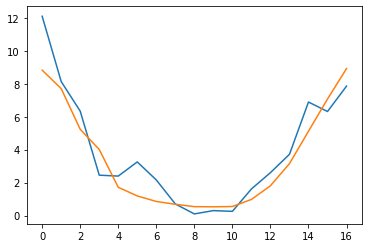

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predicao)
plt.plot(precipitacao_treino[temp_pattern:])
plt.plot(precipitacao_validacao[temp_pattern:])
plt.plot(precipitacao_teste[temp_pattern:])